# Nanodegree Engenheiro de Machine Learning
## Unsupervised Learning
## Project 3: Creating Customer Segments

Bem-vindo ao terceiro projeto do Nanodegree Engenheiro de Machine Learning! Neste Notebook, alguns modelos de código já foram fornecidos e será seu trabalho implementar funcionalidades adicionais necessárias para completar seu projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que os blocos de código seguintes vão precisar de funcionalidades adicionais que você deve fornecer. As instruções serão fornecidas para cada seção e as especificações da implementação são marcados no bloco de código com um `'TODO'`. Leia as instruções atentamente!

Além de implementar códigos, há perguntas que você deve responder relacionadas ao projeto e a sua implementação. Cada seção na qual você responderá uma questão está precedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e forneça respostas completas nos boxes seguintes que começam com **'Resposta:'**. O envio do seu projeto será avaliado baseado nas suas respostas para cada uma das questões e na implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho do teclado **Shift+Enter**. Além disso, células de Markdown podem ser editadas ao dar duplo clique na célula para entrar no modo de edição.

## Começando

Neste projeto, você irá analisar o conjunto de dados de montantes de despesas anuais de vários clientes (reportados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um objetivo deste projeto é melhor descrever a variação de diferentes tipos de clientes que um distribuidor de atacado interage. Isso dará ao distribuidor discernimento sobre como melhor estruturar seu serviço de entrega de acordo com as necessidades de cada cliente.

O conjunto de dados deste projeto pode ser encontrado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para efeitos de projeto, os atributos `'Channel'` e `'Region'` serão excluídos da análise – que focará então nas seis categorias de produtos registrados para clientes.

Uma pequena descrição dos atributos do Dataset é mostrada abaixo:
- FRESH: annual spending (m.u.) on fresh products (Continuous); 
- MILK: annual spending (m.u.) on milk products (Continuous); 
- GROCERY: annual spending (m.u.) on grocery products (Continuous); 
- FROZEN: annual spending (m.u.) on frozen products (Continuous) 
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous); 
- CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal) 
- REGION: customers Region Lisnon, Oporto or Other (Nominal) 

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes da distribuidora, junto com algumas das bibliotecas de Python necessárias exigidos para este projeto. Você saberá que o conjunto de dados carregou com êxito se o tamanho do conjunto de dados for reportado.

In [1]:
# Importe as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Mostre matplotlib no corpo do texto (bem formatado no Notebook)
%matplotlib inline

# Carregue o conjunto de dados dos clientes da distribuidora de atacado
try:
    data = pd.read_csv("customers.csv")
    print(data.head())
    # Remove as colunas (atributos) 'Region' e 'Channel'
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
# Vamos dar uma olhada rápida como o Dataset ficou
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113d3b0f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113fb1ef0>]], dtype=object)

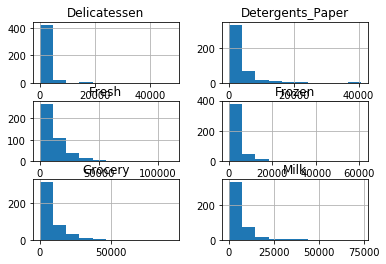

In [3]:
data.hist()

## Observando os Dados
Nesta seção, você vai começar a explorar os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Você vai observar descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados que você vai seguir no decorrer do curso deste projeto.

Execute o bloco de código abaixo para observar as descrições estatísticas sobre o conjunto de dados. Note que o conjunto é compostos de seis categorias importantes de produtos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'**. Considere o que cada categoria representa em termos os produtos que você poderia comprar.

In [4]:
# Mostre a descrição do conjunto de dados
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# FORFUN: Algumas informações do Dataset
print('Existem {:d} pontos no conjunto de dados'.format(data.shape[0]))

# FORFUN: Verificando os quartis de Frozen, por exemplo
print('A média das compras de congelados ("Frozen") foi de $ {:.2f}/ano'.format(data['Frozen'].mean()))

qtiles = data['Frozen'].quantile([.25, .5, .75]).as_matrix()
print('A mediana das compras de congelados ("Frozen") foi de $ {:.2f}/ano'.format(qtiles[1]))
print('25% das compras de congelados ("Frozen") foram abaixo de $ {:.2f}/ano'.format(qtiles[0]))
print('25% das compras de congelados ("Frozen") foram acima de $ {:.2f}/ano'.format(qtiles[2]))

Existem 440 pontos no conjunto de dados
A média das compras de congelados ("Frozen") foi de $ 3071.93/ano
A mediana das compras de congelados ("Frozen") foi de $ 1526.00/ano
25% das compras de congelados ("Frozen") foram abaixo de $ 742.25/ano
25% das compras de congelados ("Frozen") foram acima de $ 3554.25/ano


### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

In [6]:
# FORFUN: Caso queira selecionar aleatoriamente no Dataset
# Preferiu-se não usar esse código, pois a resposta da Questão 1 teria que ser refeita a cada execução desse notebook
#randomvalues = np.random.randint(440, size=3)
#indices = randomvalues

In [7]:
# TODO: Selecione três índices de sua escolha que você gostaria de obter como amostra do conjunto de dados
indices = [10, 15, 65]

# Crie um DataFrame das amostras escolhidas
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,10253,1114,3821,397,964,412
2,85,20959,45828,36,24231,1423


In [8]:
# FORFUN: Ver onde estão as amostras com relação às médias
print("Chosen samples offset from mean of dataset:")
display(samples - np.around(data.mean().values))

Chosen samples offset from mean of dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-8634.0,-393.0,5023.0,1328.0,3096.0,219.0
1,-1747.0,-4682.0,-4130.0,-2675.0,-1917.0,-1113.0
2,-11915.0,15163.0,37877.0,-3036.0,21350.0,-102.0


Quartile Visualization of Chosen samples:


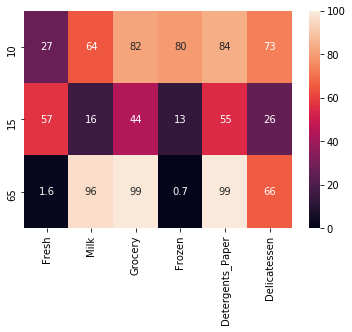

In [9]:
# FORFUN: Ver onde estão as amostras com relação à sua posição nos percentis
print("Quartile Visualization of Chosen samples:")
import seaborn as sns

# Computes percentage rank of data
# http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.rank.html
percentiles = data.rank(pct=True)

# Deixa em 3 dígitos xx.x
percentiles = 100*percentiles.round(decimals=3)

# Seleciona as amostras em 'indices'
percentiles = percentiles.iloc[indices]
sns.heatmap(percentiles, 
            vmin=0, 
            vmax=100, 
            annot=True)

### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
*Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?*  
**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

**Resposta:** O tipo de estabelecimento (de cliente) que cada uma das três amostras escolhidas representa pode ser descrito abaixo:
- Amostra 10: Possui consumos razoavelmente altos com relação aos outros. Fica posicionado acima das outras amostras exceto pelo consumo de Produtos Frescos. Consome bastante Doces. Um **café**, **padaria** ou uma **empresa de produção de doces**, por exemplo, possui essas características.
- Amostra 15: Possui baixos consumos com relação aos outros. Fica posicionado aproximadamente no meio das amostras para os clientes que consomem anualmente Produtos Frescos, Mantimentos e Produtos de Limpeza. Um **restaurante** ou um **hotel**, por exemplo, possui essas características.
- Amostra 65: Possui alto consumo anula de produtos derivados do Leite, Mantimentos e Produtos de limpeza, se localizando no grupo do 5% que mais compram esses produtos. Um **mercado**, por exemplo, possui essas características.

### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

In [11]:
# Carregar os imports
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado
target_array = data['Detergents_Paper']
new_data = data.drop('Detergents_Paper', axis = 1)

# TODO: Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                    target_array, 
                                                    test_size=0.25, 
                                                    random_state=50)

# TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
regressor = DecisionTreeRegressor(random_state=50)
regressor = regressor.fit (X_train, 
                           y_train)
y_pred = regressor.predict(X_test)

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
score = regressor.score(X_test, 
                        y_test)
print(score)

0.778099192945


In [12]:
# FORFUN: Testando todos
for column in data.columns.values:
    # Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado
    target_array = data[column]
    new_data = data.drop(column, axis = 1)
    
    # Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
    X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                        target_array, 
                                                        test_size=0.25, 
                                                        random_state=50)

    # Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
    regressor = DecisionTreeRegressor(random_state=50)
    regressor = regressor.fit (X_train, 
                               y_train)
    y_pred = regressor.predict(X_test)

    # Reportar a pontuação da previsão utilizando o conjunto de teste
    score = regressor.score(X_test, 
                            y_test)
    if (score < 0):
        print("Score (R^2) negativo para atributo {} (modelo falhou em ajustar os dados)".format(column))
    else:
        print("Score (Rˆ2) para atributo {} é de {}".format(column, score))

Score (R^2) negativo para atributo Fresh (modelo falhou em ajustar os dados)
Score (Rˆ2) para atributo Milk é de 0.15610348561723175
Score (Rˆ2) para atributo Grocery é de 0.7127493539819663
Score (R^2) negativo para atributo Frozen (modelo falhou em ajustar os dados)
Score (Rˆ2) para atributo Detergents_Paper é de 0.7780991929451163
Score (R^2) negativo para atributo Delicatessen (modelo falhou em ajustar os dados)


### Questão 2
*Qual atributo você tentou prever? Qual foi a pontuação da previsão reportada? Esse atributo é necessário para identificar os hábitos de compra dos clientes?*  
**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados.

**Resposta:** Tentei prever primeiramente o atributo `'Detergents_Paper'` o que de forma interessante foi o atributo com o maior score (Rˆ2) 0.7781. Como ele é o mais fácil de prever a partir dos outros dados (77,81% de sua variabilidade é explicada pelos demais atributos do Datase), ele é o menos necessário para o modelo. Da mesma forma o atributo `'Grocery'`. Já os demais atributos são mais necessários para identificar os hábitos de compra dos clientes, pois é mais difícil inferí-los a partir dos outros atributos do Dataset.

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

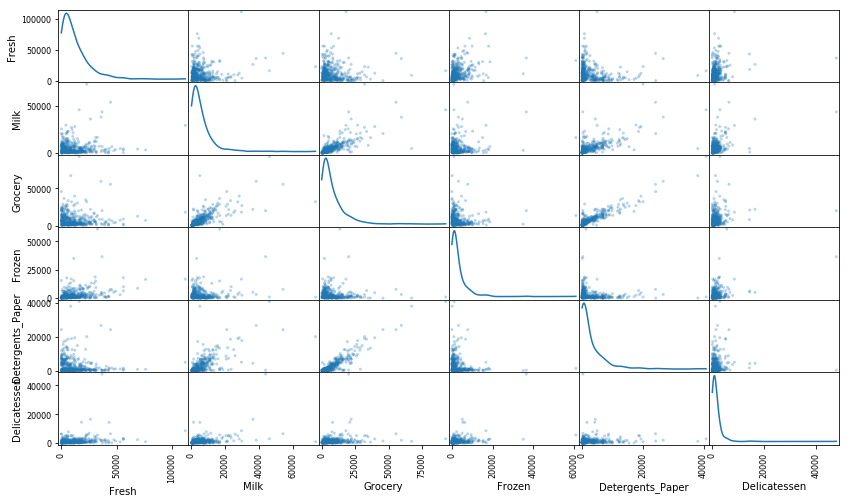

In [13]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.plotting.scatter_matrix(data, 
                           alpha = 0.3, 
                           figsize = (14,8), 
                           diagonal = 'kde');

### Questão 3
*Há algum par de atributos que mostra algum grau de correlação? Isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever? Como os dados desses atributos são distribuídos?*  
**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos de dados está? 

<img src="correlation.png" width=75%\>

**Resposta:** Acima a figura demonstra os pares que parecem apresentar um certo grau de correlação entre as variáveis `'Milk'` e `'Grocery'`, `'Milk'` e `'Detergent_Paper'` e `'Grocery'` e `'Detergent_Paper'` (praticamente redundantes). Isso confirma as suspeitas, pois exatamente esses atributos são os que apresentaram score maior que zero. Se observar bem, `'Fresh'` e `'Frozen'` parecem apresentar também uma certa correlação.

Os dados desses atributos apresentam uma distribuição assimétrica, com uma assimetria à direita ou positiva (*positive skew*), conforme ilusrado abaixo. Importante notar que os dados estão distorcidos positivamente, mais concentrados na origem, por isso o pré-processamento (a seguir) é feito no dado.

<img src="distribution.jpeg" width=55%\>

>How do outliers affect normal distribution in statistics?, URL: https://www.quora.com/How-do-outliers-affect-normal-distribution-in-statistics

In [14]:
# FORFUN: aqui é possível calcular a assimetria (skew) das amostras. Quanto mais próximo de zero (0) mais normal 
#é a distribuição, quanto mais positivo, mais à direita, e quanto mais negativo, mais à esquerda
from scipy.stats import skew
skness = skew(data)

# Observe que Delicatessen, o último apresenta maior assimetria, e Fresh a menor, como pode-se observar no gráfico
print(skness)

[  2.55258269   4.03992212   3.57518722   5.88782573   3.61945758
  11.11353365]


## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado] ](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o algoritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

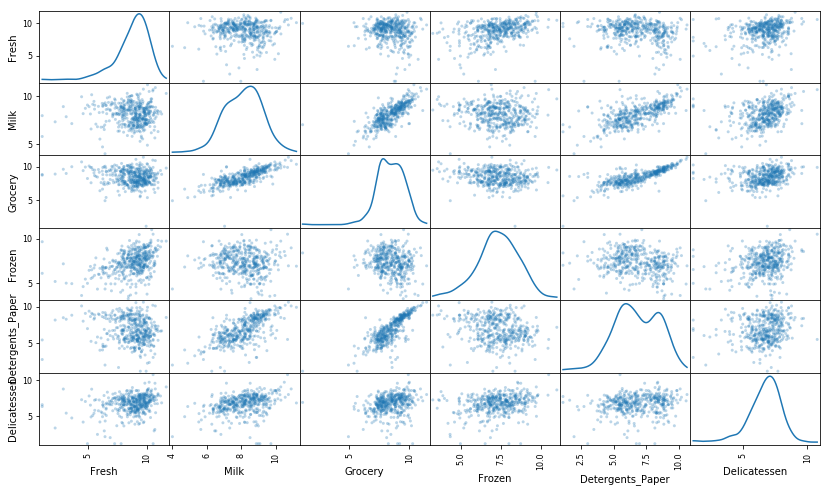

In [15]:
# TODO: Escalone os dados utilizando o algoritmo natural
log_data = np.log(data)

# TODO: Escalone a amostra de dados utilizando o algoritmo natural
log_samples = np.log(samples)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.plotting.scatter_matrix(log_data, 
                           alpha = 0.3, 
                           figsize = (14,8), 
                           diagonal = 'kde');

### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [16]:
# Mostre a amostra dados log-transformada
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
1,9.235326,7.015712,8.248267,5.983936,6.871091,6.021023
2,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523


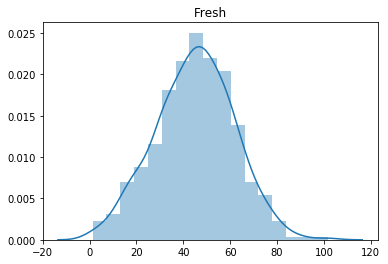

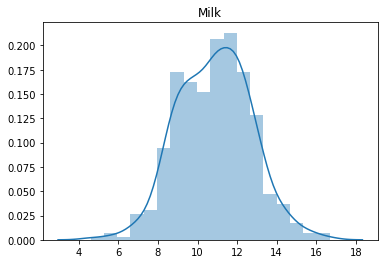

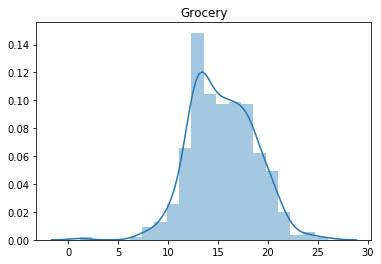

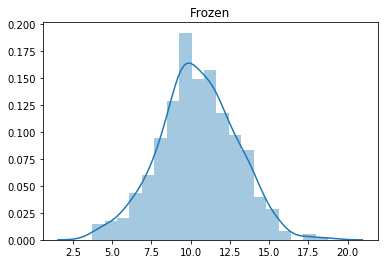

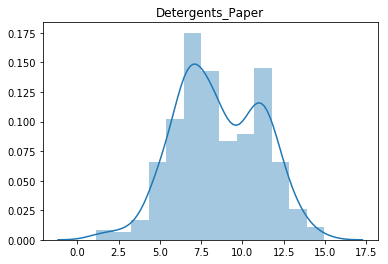

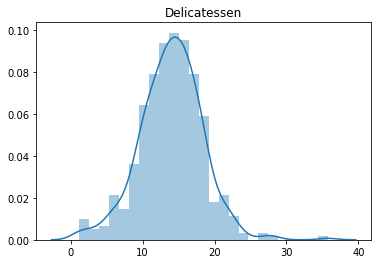

In [17]:
# FORFUN: Exemplo usando Box-Cox (se for usar, tem que aplicar em um atributo por vez)
from scipy.stats import boxcox
import matplotlib.pyplot as plt

for column in data.columns.values:
    boxcox_transformed_data = boxcox(data[column])
    plt.figure() #this creates a new figure on which your plot will appear
    plt.title(column)
    sns.distplot(boxcox_transformed_data[0])

Note que a distribuição usando o Box-Cox ficou bastante semelhante à aplicação do logaritmo natural `'log'`. No entanto, ela teria que ser aplicada em uma coluna por vez, aparentemente uma limitação da função na biblioteca do `'scipy'`.

/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


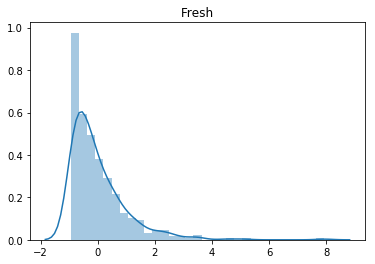

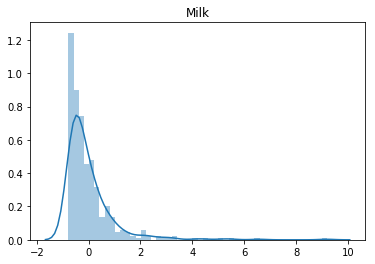

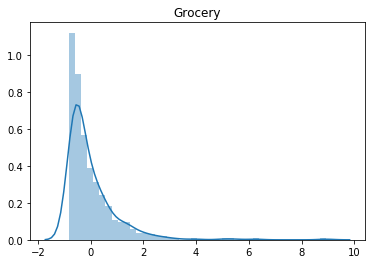

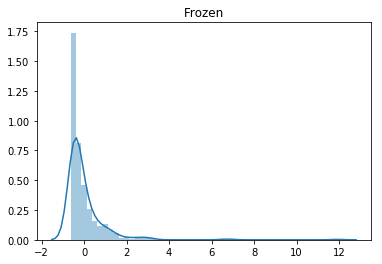

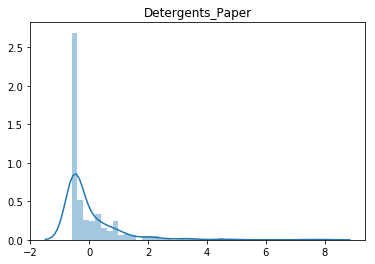

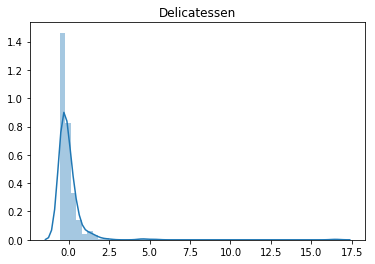

In [18]:
# FORFUN: Exemplo usando Box-Cox (se for usar, tem que aplicar em um atributo por vez)
from sklearn import preprocessing

for column in data.columns.values:
    centered_scaled_data = preprocessing.scale(data[column])
    plt.figure() #this creates a new figure on which your plot will appear
    plt.title(column)
    sns.distplot(centered_scaled_data)

Já a aplicação do scale do preprocessing resultou em uma normalização aparentemente pior do que o Box-Cox e do que a função log, como pode-se verificar (com aparentes outliers no eixo x > 2).

### Implementação: Detecção de Discrepantes
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!Once you have performed this implementation, the dataset will be stored in the variable .

In [20]:
# OPCIONAL: para registrar os outliers
all_outliers = np.array([], dtype='int64')

# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
for feature in log_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = (Q3-Q1)*1.5
    
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers = np.append(all_outliers, outliers.index.values.astype('int64'))
    
    # Mostre os discrepantes
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(outliers)
    
# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover

# Reconstruct the input array from the unique values
all_outliers, indices = np.unique(all_outliers, return_inverse=True)

# Count number of occurrences of each value in array of non-negative ints.
counts = np.bincount(indices)

# Seleciona aqueles cuja contagem é maior que 1
outliers = all_outliers[counts>1]
print("Dos seguintes outliers identificados {} ({} pontos) os seguintes índices dos pontos de dados que serão removidos {} ({} pontos)".format(all_outliers, len(all_outliers), outliers, len(outliers)))

# Remova os discrepantes, caso nenhum tenha sido especificado
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Dos seguintes outliers identificados [ 38  57  65  66  75  81  86  95  96  98 109 128 137 142 145 154 161 171
 175 183 184 187 193 203 218 233 264 285 289 304 305 325 338 343 353 355
 356 357 412 420 429 439] (42 pontos) os seguintes índices dos pontos de dados que serão removidos [ 65  66  75 128 154] (5 pontos)


### Questão 4
*Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima? Esses pontos de dados deveriam ser removidos do conjunto? Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.* 

**Resposta:** Existem vários pontos de dados que são outliers para mais de um atributo, e os que apresentaram ocorrência em mais de um deles foram as amostras cujos índices são [65, 66, 75, 128, 154]. Acredito que apenas esses 5 pontos possam ser removidos porque representam pontos incomuns em relação ao resto dos dados, e seriam de pouca utilidade na formação de clusters de clientes similares. No entanto, eu não removeria todos os 42 outliers, pois como representam 9,5% do Dataset (42/440), poderia haver perdas razoáveis de informação.

Vale a pena notar que, sem remover os outliers, o score dos algoritmos K-Means e GMM, que serão avaliados mais para frente, diminuem (de 1-2%). Ou seja, atende um dos motivos para se retirar outliers: "*the outlier affects both results and assumptions*"

>Outliers: To Drop or Not to Drop, URL: http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

>3 methods to deal with outliers, URL: https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html

## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

>Seven Techniques for Data Dimensionality Reduction, URL: https://www.knime.com/blog/seven-techniques-for-data-dimensionality-reduction

>Principal Component Analysis, URL: http://setosa.io/ev/principal-component-analysis/

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

[ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]
[ 0.44302505  0.26379218]
Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


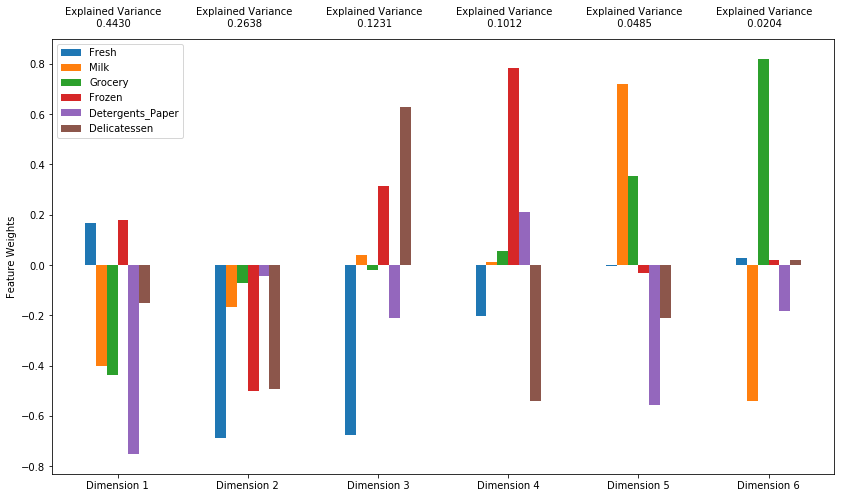

In [21]:
from sklearn.decomposition import PCA

# TODO: Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components=len(good_data.columns)).fit(good_data)

# TODO: Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(log_samples)

# Gere o plot dos resultados da PCA
pca_results = rs.pca_results(good_data, pca)

# Para verificar a variância explicada pelas 6 componentes
print(pca.explained_variance_ratio_)

# Para verificar a variância explicada pelas 2 primeiras componentes:
print(pca.explained_variance_ratio_[:2])

# Imprimindo a variância cumulativa
print(pca_results['Explained Variance'].cumsum())

### Questão 5
*Quanta variância nos dados é explicado * ***no total*** * pelo primeiro e segundo principal componente? E os quatro primeiros principais componentes? Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões melhor representa em termos de despesas dos clientes.*  
**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resposta:** 70,68% da variância é explicada pela primeira E pela segunda componente. Esse resultado pode ser visto diretamente no comando `'pca_results['Explained Variance'].cumsum()'`, na segunda linha, ou somando-se as *Explained Variance* da primeira (44,30%) e da segunda (26,38%) componente. De forma análoga, encontramos que 93,11% da variância é explicada pelos quatro primeiros principais componentes.

Analisando as 4 primeiras dimensões, parece que a primeira dimensão é fortemente dependente de `'Detergents_Paper'`, `'Grocery'` e `'Milk'`, que são as 3 características que foram identificadas acima como sendo altamente correlacionadas. A segunda dimensão parece ser ortogonal à primeira, reduzindo o impacto de `'Milk'`, `'Grocery'` e `'Detergents_Paper'`, e depende fortemente da variação nos atributos `'Fresh'`, `'Frozen'` e `'Delicatessen'`. A terceira dimensão parece ser de baixa influência no modelo, dependendo basicamente de `'Fresh'` e `'Delicatessen'`. E a quarta dimensão dependendo fortemente de `'Frozen'` e `'Delicatessen'`.

>Interpretation of the Principal Components, URL: https://onlinecourses.science.psu.edu/stat505/node/54

### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [22]:
# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.0887,-0.7006,0.8537,1.0105,-0.5587,0.2495
1,0.4258,0.8803,-1.2189,-0.7945,-0.7319,0.3868
2,-5.6796,3.9535,1.4373,-1.5213,0.2948,0.0874


### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

In [23]:
# TODO: Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components=2).fit(good_data)

# TODO: Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [24]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.0887,-0.7006
1,0.4258,0.8803
2,-5.6796,3.9535


## Visualizando os dados
O diagrama de dispersão abaixo mostra os ponto de dados do Dataset, representados por suas pontuações ao longo dos principais componentes. Os eixos são os componentes principais (neste caso Dimensão 1 e Dimensão 2). Além disso, o gráfico mostra a projeção dos recursos originais ao longo dos componentes. Ele pode nos ajudar a interpretar as dimensões reduzidas dos dados e descobrir relacionamentos entre os principais componentes e características originais.

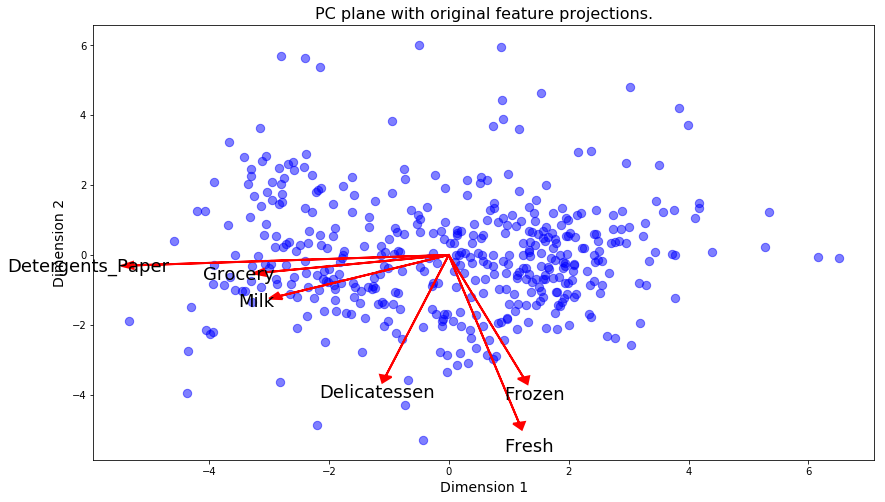

In [25]:
# Import supplementary visualizations code visuals.py
import visuals as vs

# FORFUN: Create a biplot
vs.biplot(good_data, 
          reduced_data, 
          pca)

É interessante notar que e `'Milk'`, `'Grocery'` e `'Detergent_Paper'` estão correlacionados (retas próximas), bem como e `'Fresh'` e `'Frozen'`, conforme já identificado nas análises anteriores.

## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

<img src="ml_map.png" />

>Choosing the right estimator, URL: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Questão 6
*Quais são as vantagens de utilizar o algoritmo de clustering K-Means? Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano (GMM)? Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.*

**Resposta:** Um bom começo para analisar qual a escolha do algoritmo é a figura acima. De início, pode-se perceber que os dois algoritmos (K-Means e GMM) são para quando:
- Os dados **não são rotulados**;
- O número de atributos/categorias é conhecido (no exemplo desse trabalho são 6 atributos);
- O número de **amostras é abaixo de 10K** (que também é o caso desse problema, onde temos 440 amostras).

Uma primeira diferença é que se o K-Means não convergir ("*not working*"), então aconselha-se o uso do GMM. O K-Means também é de fácil uso e implementação. Abaixo uma comparação dos dois algoritmos:

### K-Means

- A vantagem do K-means é a simplicidade de seus pressupostos que permitem que o algoritmo seja robusto, confiável e rápido. Isso também permite que o modelo supera outros algoritmos em grandes conjuntos de dados. Além disso, enquanto K-means sempre converge (local ou globalmente) nos K-clusters após um determinado número de iterações, esse algoritmo é o melhor quando do Dataset está **claramente definido** e **bem gerado**.

### Gaussian Mixture Model (GMM)

- A vantagem do Modelo de Mistura Gaussiano (GMM), é a sua capacidade de incorporar a covariância entre os pontos no modelo para identificar clusters mais complexos. Ao contrário do K-means, que assume, durante cada iteração, que qualquer ponto dado pode pertencer a um cluster específico, o GMM também leva em consideração o nível de certeza com o qual um ponto pertence a um determinado cluster. Essa incerteza também é revisada durante cada iteração tornando o algoritmo **mais flexível** ao atribuir pontos a um cluster e capaz de se comportar bem em conjuntos de **dados menos definidos**.

Apesar dos dados não apresentarem densidades distintas no gráfico de distibuição com as 2 Dimensões (`'biplot'`), onde visualmente poderia perceber uma certa clusterização ou não, eu utilizaria inicialmente o K-Means e, se ele não resultar em uma boa solução, usaria o GMM (na verdade vou testar os dois para comparar os resultados).

### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

# TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
clusterer = KMeans(n_clusters=2, random_state=50).fit(reduced_data)

# TODO: Preveja o cluster para cada ponto de dado
preds = clusterer.predict(reduced_data)

# TODO: Ache os centros do cluster
centers = clusterer.cluster_centers_

# TODO: Preveja o cluster para cada amostra de pontos de dado transformados
sample_preds = clusterer.predict(pca_samples)

# TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
score = silhouette_score(reduced_data, 
                         clusterer.labels_, 
                         metric='euclidean')

print("KMeans score", score)

KMeans score 0.426281015469


In [27]:
# FORFUN: vamos testar para outros números de cluster
silhouette = []
n_clusters = []

for n in range(2,31):
    # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer = KMeans(n_clusters=n, random_state=50).fit(reduced_data)

    # TODO: Preveja o cluster para cada ponto de dado
    preds = clusterer.predict(reduced_data)

    # TODO: Ache os centros do cluster
    centers = clusterer.cluster_centers_

    # TODO: Preveja o cluster para cada amostra de pontos de dado transformados
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    score = silhouette_score(reduced_data, 
                             clusterer.labels_, 
                             metric='euclidean')
    n_clusters.append(n)
    silhouette.append(score)

    print("For n_clusters = {},  KMeans score is {}".format(n, score))

For n_clusters = 2,  KMeans score is 0.4262810154691083
For n_clusters = 3,  KMeans score is 0.39689092644980506
For n_clusters = 4,  KMeans score is 0.3311955841612473
For n_clusters = 5,  KMeans score is 0.3522088743526429
For n_clusters = 6,  KMeans score is 0.36551710525876335
For n_clusters = 7,  KMeans score is 0.36396157294051723
For n_clusters = 8,  KMeans score is 0.353331631442732
For n_clusters = 9,  KMeans score is 0.3409240901742661
For n_clusters = 10,  KMeans score is 0.36290159247575565
For n_clusters = 11,  KMeans score is 0.3520826593364349
For n_clusters = 12,  KMeans score is 0.35296901824165083
For n_clusters = 13,  KMeans score is 0.36382037665412165
For n_clusters = 14,  KMeans score is 0.37121387526681004
For n_clusters = 15,  KMeans score is 0.34610386070049787
For n_clusters = 16,  KMeans score is 0.3376108989555741
For n_clusters = 17,  KMeans score is 0.33955505692642335
For n_clusters = 18,  KMeans score is 0.3528092047024467
For n_clusters = 19,  KMeans sc

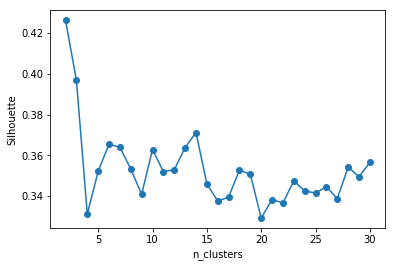

In [28]:
# Plotando 
import matplotlib.pyplot as plt
plt.plot(n_clusters, silhouette, '-o')
plt.ylabel("Silhouette")
plt.xlabel("n_clusters")
plt.show()

### Questão 7
*Reporte o coeficiente de silhueta para vários números de cluster que você tentou. Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?* 

**Resposta:** Acima uma análise de várias quantidades de clusters (2 a 30). A que possui melhor pontuação para o K-means é quando `'n_clusters = 2'`.

### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

In [29]:
# n_clusters = 2 
# TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
clusterer = KMeans(n_clusters=2, random_state=50).fit(reduced_data)

# TODO: Preveja o cluster para cada ponto de dado
preds = clusterer.predict(reduced_data)

# TODO: Ache os centros do cluster
centers = clusterer.cluster_centers_

# TODO: Preveja o cluster para cada amostra de pontos de dado transformados
sample_preds = clusterer.predict(pca_samples)

# TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')

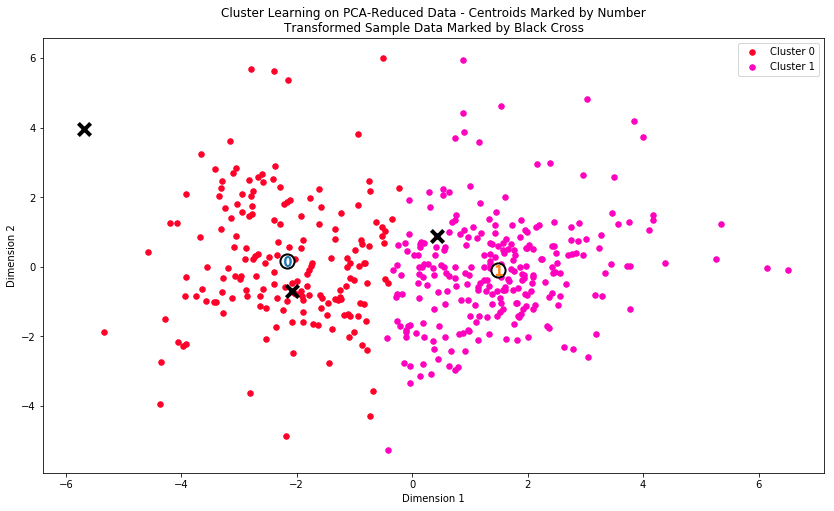

In [30]:
# Mostre os resultados do clustering da implementação
rs.cluster_results(reduced_data, 
                   preds, 
                   centers, 
                   pca_samples)

### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


In [31]:
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centers)

# TODO: Exponencie os centros
true_centers = np.exp(log_centers)

# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


### Questão 8
Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?*  
**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`.

**Resposta:** Analisando o centro de cada cluster temos a seguinte descrição:
- **Segment 0**: Esse cluster englobou os clientes que compram anualmente bastante produtos derivados do leite (`'Milk'`), mercearia (`'Grocery'`), produtos de limpeza (`'Detergents_Paper'`) e doces (`'Delicatessen'`). Nesse perfil, encaixam-se estabelecimentos como Hotéis, Restaurantes e Cafés;
- **Segment 1**: Esse cluster englobou os clientes que compram anualmente bastante produtos congelados (`'Frozen'`) e produtos frescos (`'Fresh'`). Nesse perfil, encaixam-se estabelecimentos como Revendas/Varejistas (outros mercados);

### Questão 9
*Para cada amostra de ponto, qual segmento de cliente da* ***Questão 8*** *é melhor representado? As previsões para cada amostra de ponto são consistentes com isso?*

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [32]:
# Mostre as previsões
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [33]:
# FORFUN: Transforme inversamento os dados previstos
inverse_data = pca.inverse_transform(reduced_samples)

# FORFUN: Exponencie os dados
true_data = np.exp(inverse_data)

true_dataset = pd.DataFrame(np.round(true_data), columns = data.keys())

display(true_dataset)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7314.0,8814.0,12393.0,1485.0,4439.0,1562.0
1,3767.0,2466.0,3683.0,1053.0,627.0,491.0
2,165.0,17107.0,42998.0,76.0,54124.0,268.0


**Resposta:** Como pode-se observar, realmente os pontos 0 e 2 amostrados se encaixam no **Segmento 0** (Cluster 0) consomem uma quantidade alta de produtos derivados do leite ('Milk'), mercearia ('Grocery'), produtos de limpeza ('Detergents_Paper') sendo que o ponto 2 desvia um pouco com relação doces ('Delicatessen'). Por outro lado, o ponto 1 se encaixa no **Segmento 1**, pois consome razoavelmente produtos congelados ('Frozen') e produtos frescos ('Fresh') com relação ao ponto 2, mas nem tanto se comparar ao ponto 1. Na verdade ele consome poucos produtos derivados do leite ('Milk'), mercearia ('Grocery'), produtos de limpeza ('Detergents_Paper') e doces ('Delicatessen'), e por isso não se encaixa no **Segmento 0**.

## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente. *Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?*  
**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resposta:** Ao agrupar os clientes, temos uma melhor ideia de qual grupo de clientes podemos aplicar a mudança para que nossos resultados sejam mais precisos. Podemos então proceder com a aplicação da mudança em apenas um grupo. 

Por exemplo, podemos aplicar no Grupo A (grupo de controle) para ver a comparação entre outros grupos e decidir se podemos aplicar essas mudanças ao grupo de clientes. Outro benefício do teste A/B é que apenas um conjunto de clientes será afetado. O **Segmento 0** de clientes tem mais gastos com produtos derivados do leite (`'Milk'`), mercearia (`'Grocery'`), produtos de limpeza (`'Detergents_Paper'`) e doces (`'Delicatessen'`). Quando mudamos o horário de entrega 3 dias por semana a partir de 5 dias, veremos o impacto. Se o impacto for positivo, podemos aplicar a mudança apenas a esses grupos de clientes. Já o **Segmento 1** de clientes tem mais gastos com produtos congelados (`'Frozen'`) e produtos frescos (`'Fresh'`), de modo que a mudança de horário de entrega para 3 dias por semana é meio arriscada para esse grupo. Com o teste A/B, diminuiríamos nosso risco implementando nossas mudanças apenas um grupo de clientes.

O primordial aqui é notar que se testamos aqui somente um cluster, pode se obter um resultado totalmente diferente no outro. Em um teste A/B seria importante entender cada cluster como um tipo de cliente distinto, sem misturar, para assim ter um conhecimento maior dos seus clientes.

>It’s All A/Bout Testing: The Netflix Experimentation Platform, URL: https://medium.com/netflix-techblog/its-all-a-bout-testing-the-netflix-experimentation-platform-4e1ca458c15

>When should A/B testing not be trusted to make decisions?, URL: https://www.quora.com/When-should-A-B-testing-not-be-trusted-to-make-decisions/answer/Edwin-Chen-1

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
*Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de* ***segmentação de clientes*** *?
**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resposta:** O cluster/segmento ao qual os atribuímos o cliente é uma informação que pode ser usada como entrada ao prever outros rótulos, como o tipo de cliente que eles são ou quanto de uma determinada categoria eles provavelmente comprarão.

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

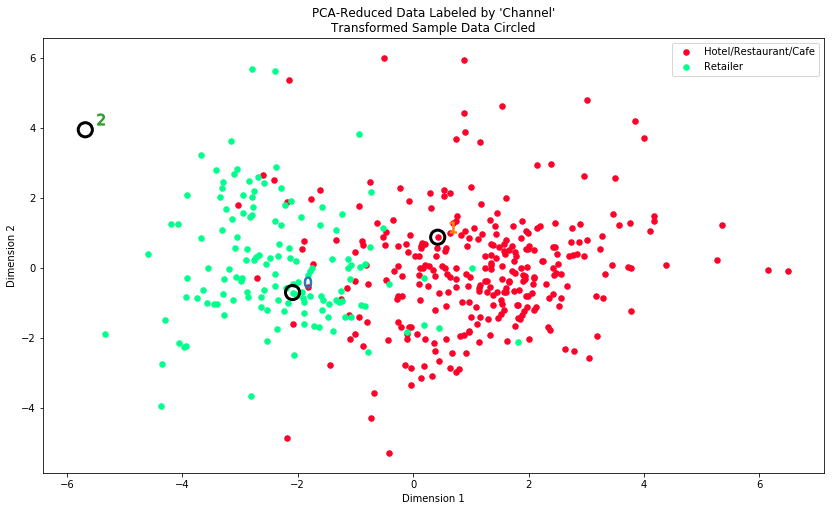

In [34]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
rs.channel_results(reduced_data, 
                   outliers, 
                   pca_samples)

### Questão 12
*Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista? Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição? Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

In [35]:
#FORFUN: E se eu usasse o GMM? Qual seria o resultado final?
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,
                         preds)

print(score)

0.422324682646


In [36]:
# FORFUN: vamos testar para outros números de componentes
silhouette = []
n_components = []

for n in range(2,31):
    # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer = GaussianMixture(n_components=n).fit(reduced_data)

    # TODO: Preveja o cluster para cada ponto de dado
    preds = clusterer.predict(reduced_data)

    # TODO: Ache os centros do cluster
    centers = clusterer.means_

    # TODO: Preveja o cluster para cada amostra de pontos de dado transformados
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    score = silhouette_score(reduced_data, 
                             preds)
    n_components.append(n)
    silhouette.append(score)

    print("For n_components = {},  GMM score is {}".format(n, score))

For n_components = 2,  GMM score is 0.4219168464626147
For n_components = 3,  GMM score is 0.3742018475403217
For n_components = 4,  GMM score is 0.3208455238703069
For n_components = 5,  GMM score is 0.34189038303154684
For n_components = 6,  GMM score is 0.2503920660894917
For n_components = 7,  GMM score is 0.253482862614037
For n_components = 8,  GMM score is 0.3148709617216746
For n_components = 9,  GMM score is 0.29485200607391576
For n_components = 10,  GMM score is 0.2963193786960917
For n_components = 11,  GMM score is 0.28950169137571014
For n_components = 12,  GMM score is 0.3109542517551029
For n_components = 13,  GMM score is 0.2936046266333215
For n_components = 14,  GMM score is 0.3335800343636731
For n_components = 15,  GMM score is 0.3072294324012605
For n_components = 16,  GMM score is 0.2990304558661856
For n_components = 17,  GMM score is 0.2976414944735529
For n_components = 18,  GMM score is 0.31931758575854396
For n_components = 19,  GMM score is 0.31164610854865

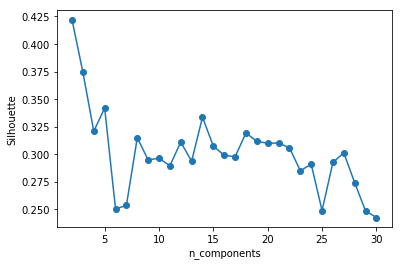

In [37]:
# Plotando 
import matplotlib.pyplot as plt
plt.plot(n_components, silhouette, '-o')
plt.ylabel("Silhouette")
plt.xlabel("n_components")
plt.show()

0.422324682646


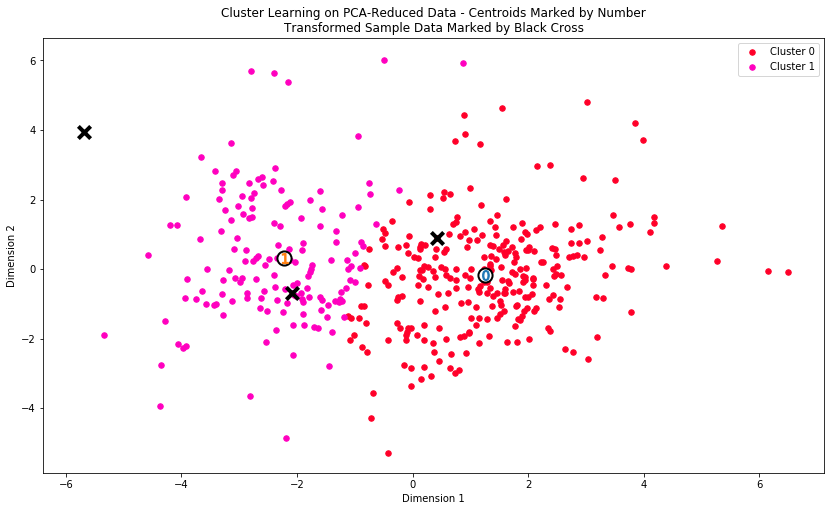

In [39]:
# n_components = 2
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,
                         preds)

print(score)

# Mostre os resultados do clustering da implementação
rs.cluster_results(reduced_data, 
                   preds, 
                   centers, 
                   pca_samples)

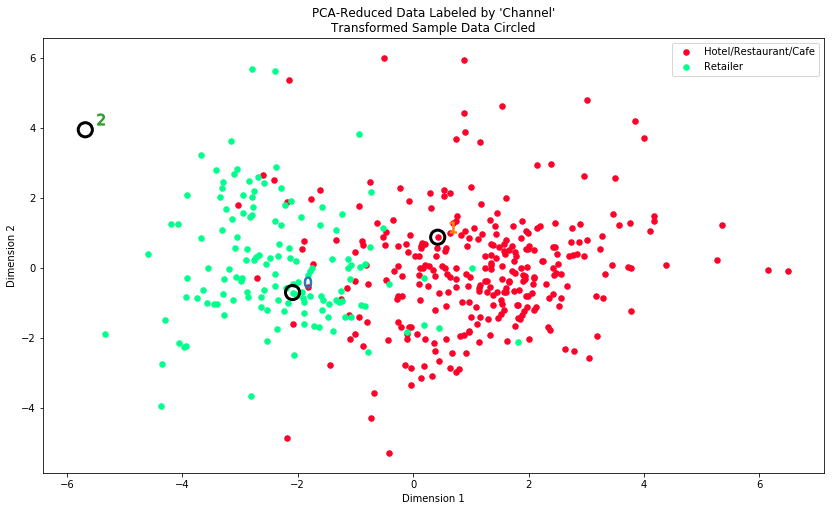

In [41]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
rs.channel_results(reduced_data, 
                   outliers, 
                   pca_samples)

**Resposta:** Primeiramente, de acordo com a figura que mostra os resultados do clustering baseado nos dados do 'Channel', o Cluster 0 será 'Hotéis/Restaurantes/Cafés' e o Cluster 1 será Varejistas '. Essas classificações são consistentes com a definição anterior dos segmentos de clientes tanto no K-Means quanto no GMM. Por fim, observou-se que o K-Means apresentou um score melhor que o GMM para esse problema, demonstrando ser, de fato, uma boa escolha:
- For n_clusters = 2,  KMeans score is 0.4262;
- For n_components = 2,  GMM score is 0.4223.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.

Um exercício futuro, interesante, seria usar BIC para determinar o número de clusters e o tempo de execução dos dois algoritmos para fins de benchmarking.